# Download T2M from ERA Datasat

**Setup the CDS API personal access token**  
Here is how to setup the CDS API personal access token:  
If you do not have an account yet, please register.  
If you are not logged in, please login.  
Once logged in, copy the code displayed below to the file $HOME/.cdsapirc  
(in your Unix/Linux environment)  
url: https://cds.climate.copernicus.eu/api  
key: 128a88aa-bc19-4d14-a238-caae7472fc9b  

**Install the CDS API client**
The CDS API client is a Python based library. It provides support for Python 3.  
You can install the CDS API client via the package management system pip, by running on Unix/Linux the command below.  
$ pip install "cdsapi>=0.7.4"

In [1]:
from pathlib import Path

rc = Path("~/.cdsapirc").expanduser()
#print("--- .cdsapirc contents ---")
#print(rc.read_text())

!pip show cdsapi

Name: cdsapi
Version: 0.7.6
Summary: Climate Data Store API
Home-page: https://github.com/ecmwf/cdsapi
Author: ECMWF
Author-email: software.support@ecmwf.int
License: Apache 2.0
Location: /media/nas/uwork1/rpotthas/ropy/lib64/python3.11/site-packages
Requires: ecmwf-datastores-client, requests, tqdm
Required-by: 


### Standard Example from Copernicus Website

In [2]:
import cdsapi

client = cdsapi.Client()

dataset = 'reanalysis-era5-pressure-levels'
request = {
  'product_type': ['reanalysis'],
  'variable': ['geopotential'],
  'year': ['2024'],
  'month': ['03'],
  'day': ['01', '02'],
  'time': ['12:00'],
  'pressure_level': ['1000'],
  'data_format': 'grib',
}
target = 'download.grib'

client.retrieve(dataset, request, target)

2026-01-05 12:07:05,634 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2026-01-05 12:07:05,833 INFO Request ID is ae3d0d2c-4691-499a-ad20-f0f34ea04df0
2026-01-05 12:07:05,906 INFO status has been updated to accepted
2026-01-05 12:07:19,776 INFO status has been updated to running
2026-01-05 12:07:27,450 INFO status has been updated to successful


fa8bc6a755d9d8c70d302ee260b52e3b.grib:   0%|          | 0.00/3.96M [00:00<?, ?B/s]

'download.grib'

### T2M for Jan 1, 2025 at 12 UTC

In [3]:
import cdsapi

client = cdsapi.Client()

client.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['2m_temperature'],
        'year': ['2025'],
        'month': ['01'],
        'day': ['01'],
        'time': ['12:00'],
        'format': 'netcdf',           # Or 'grib' if preferred
        'area': [90, -180, -90, 180], # Global coverage (optional)
    },
    'era5_t2m_2025_01_01_12.nc'
)

2026-01-05 12:07:46,066 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2026-01-05 12:07:46,445 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2026-01-05 12:07:46,447 INFO Request ID is 996c63c2-7a59-40ac-bd11-174cc8b5cec6
2026-01-05 12:07:46,489 INFO status has been updated to accepted
2026-01-05 12:08:00,268 INFO status has been updated to running
2026-01-05 12:08:19,345 INFO status has been updated to successful


81b0e41e1878d2b21ecd6ac09db65cff.nc:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

'era5_t2m_2025_01_01_12.nc'

### Inspect and Visualize


📋 Dataset Overview:
<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2025-01-01T12:00:00
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    number      int64 8B ...
    expver      <U4 16B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-05T11:08 GRIB to CDM+CF via cfgrib-0.9.1...

📦 Variables in the file:
['t2m']

🔍 t2m Variable Info:
<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]

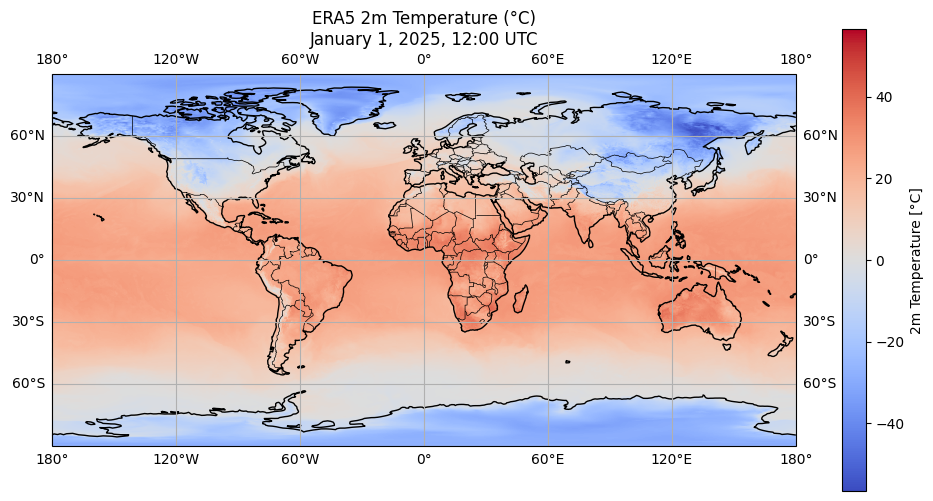

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the NetCDF file
ds = xr.open_dataset("era5_t2m_2025_01_01_12.nc")

# Show dataset structure
print("\n📋 Dataset Overview:")
print(ds)

# List variables
print("\n📦 Variables in the file:")
print(list(ds.data_vars))

# Inspect 2m temperature variable
t2m = ds['t2m'].isel(valid_time=0)  # 1st (and only) time slice
print("\n🔍 t2m Variable Info:")
print(t2m)

# Convert to Celsius (optional)
t2m_celsius = t2m - 273.15

# Plot using Cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
t2m_celsius.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    cbar_kwargs={'label': '2m Temperature [°C]'}
)

# Add geographic features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True)

plt.title("ERA5 2m Temperature (°C)\nJanuary 1, 2025, 12:00 UTC")
plt.show()
